In [1]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
import scipy ##
import cmath
from numba import objmode
from numpy.linalg import slogdet
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
import matplotlib.pyplot as plt

In [2]:
N_wn = 15
lbound = .0008     # lower bound of k in ik
ubound = 20   # upper bound of k in ik
quad_points = np.linspace(np.exp(-ubound), np.exp(-lbound), N_wn)

In [4]:
dist = 0.5
h = 0.2
    
result_ = []
sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

for index2, point2 in enumerate(quad_points):

    wavenumber = -1j * np.log(point2)

    op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
    op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
    op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
    op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

    mat11 = op11.weak_form().A
    mat12 = op12.weak_form().A
    mat21 = op21.weak_form().A
    mat22 = op22.weak_form().A
    mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
    mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

    mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    

    mat11_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat11), np.eye(mat11.shape[0]))
    mat22_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat22), np.eye(mat22.shape[0]))

    inv_free_mat2 = np.block([[mat11_inv,  mat12_zero],
                          [mat21_zero, mat22_inv]])  

    combined_inverse_free = inv_free_mat2.dot(mat)
    sign, logdet = slogdet(combined_inverse_free)
    print(logdet)
    result_.append(logdet)


print(np.trapz(-np.array(result_) / quad_points, quad_points) / (2 * np.pi))

-5.033088390560933e-10
-0.01952483753663595
-0.03647085061174629
-0.05129071799043225
-0.06409774828501812
-0.0749521263262059
-0.08392462805583249
-0.09112700538534382
-0.09672554855118716
-0.10093784634613094
-0.10401134682952871
-0.1061863375124981
-0.10765296153432607
-0.10851941647798534
-0.10881606535642255
0.02962782239444412


In [ ]:
CasE_05

In [ ]:
CasE_15 = []
dist = 1.5
for h in [0.1, 0.2]:
    
    result_ = []
    sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        
        mat11_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat11), np.eye(mat11.shape[0]))
        mat22_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat22), np.eye(mat22.shape[0]))

        inv_free_mat2 = np.block([[mat11_inv,  mat12_zero],
                              [mat21_zero, mat22_inv]])  

        combined_inverse_free = inv_free_mat2.dot(mat)
        sign, logdet = slogdet(combined_inverse_free)

        result_.append(logdet)

        
    CasE_15.append(np.trapz(-np.array(result_) / quad_points, quad_points) / (2 * np.pi))

In [8]:
CasE_30 = []
dist = 3.0
for h in [0.07, 0.1, 0.15, 0.2]:
    
    result_ = []
    sphere1 = bempp.api.shapes.sphere(h=h, origin=((dist/2) + 1, 0, 0))
    sphere2 = bempp.api.shapes.sphere(h=h, origin=(-((dist/2) + 1), 0, 0))

    space_sphere1 = bempp.api.function_space(sphere1, "P", 1)
    space_sphere2 = bempp.api.function_space(sphere2, "P", 1)
    
    rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
    rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

    snc1 = bempp.api.function_space(sphere1, "SNC", 0)
    snc2 = bempp.api.function_space(sphere2, "SNC", 0)

    for index2, point2 in enumerate(quad_points):
        
        wavenumber = -1j * np.log(point2)
        
        op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
        op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
        op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
        op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

        mat11 = op11.weak_form().A
        mat12 = op12.weak_form().A
        mat21 = op21.weak_form().A
        mat22 = op22.weak_form().A
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))

        mat = np.real(np.block([[mat11,mat12],[mat21,mat22]]))    
        
        mat11_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat11), np.eye(mat11.shape[0]))
        mat22_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat22), np.eye(mat22.shape[0]))

        inv_free_mat2 = np.block([[mat11_inv,  mat12_zero],
                              [mat21_zero, mat22_inv]])  

        combined_inverse_free = inv_free_mat2.dot(mat)
        sign, logdet = slogdet(combined_inverse_free)

        result_.append(logdet)

        
    CasE_30.append(np.trapz(-np.array(result_) / quad_points, quad_points) / (2 * np.pi))

In [1]:
h_007_no_comp = [0.03164283017966536, 0.0008871625716856583, 4.9183784701380487e-05]
#h_007_comp = [0.03173806291109195, 0.000893054597962124, 4.977075078381659e-05]

h_01_no_comp = [0.03136650979813624, 0.0008826770476095191, 4.837734373986177e-05]
#h_01_comp = [0.031461118785463815, 0.0008885308319061468, 4.891414379588829e-05]

h_015_no_comp = [0.030814697139107713, 0.0008739924571285974, 4.8020779241524095e-05]
#h_015_comp = [0.030908081727642547, 0.0008797890300503931, 4.8556448360627624e-05]

h_02_no_comp = [0.029898383316424543, 0.0008594678680767815, 4.7740656387931184e-05]
#h_02_comp = [0.02998972964856685, 0.0008651752374962216, 4.8267591870668514e-05]

In [9]:
CasE_30

[4.909513650504551e-05,
 4.8498725248225775e-05,
 4.7979955232607216e-05,
 4.7335025058883184e-05]

In [2]:
CasE_05 = [0.03164283017966536, 0.03136650979813624, 0.030814697139107713, 0.029898383316424543]
CasE_15 = [0.0008871625716856583, 0.0008826770476095191, 0.0008739924571285974, 0.0008594678680767815]
#CasE_30 = [4.909513650504551e-05, 4.8498725248225775e-05, 4.7979955232607216e-05, 4.7335025058883184e-05]
#CasE_30 = [4.977075078381659e-05,  4.891414379588829e-05, 4.8556448360627624e-05, 4.8267591870668514e-05]
CasE_30 = [4.9183784701380487e-05, 4.837734373986177e-05, 4.8020779241524095e-05, 4.7740656387931184e-05]

In [3]:
Rel_err_05 = [abs(CasE_05[0] - CasE_05[1])/CasE_05[0], abs(CasE_05[0] - CasE_05[2])/CasE_05[0], abs(CasE_05[0] - CasE_05[3])/CasE_05[0]]
Rel_err_15 = [abs(CasE_15[0] - CasE_15[1])/CasE_15[0], abs(CasE_15[0] - CasE_15[2])/CasE_15[0], abs(CasE_15[0] - CasE_15[3])/CasE_15[0]]
Rel_err_30 = [abs(CasE_30[0] - CasE_30[1])/CasE_30[0], abs(CasE_30[0] - CasE_30[2])/CasE_30[0], abs(CasE_30[0] - CasE_30[3])/CasE_30[0]]

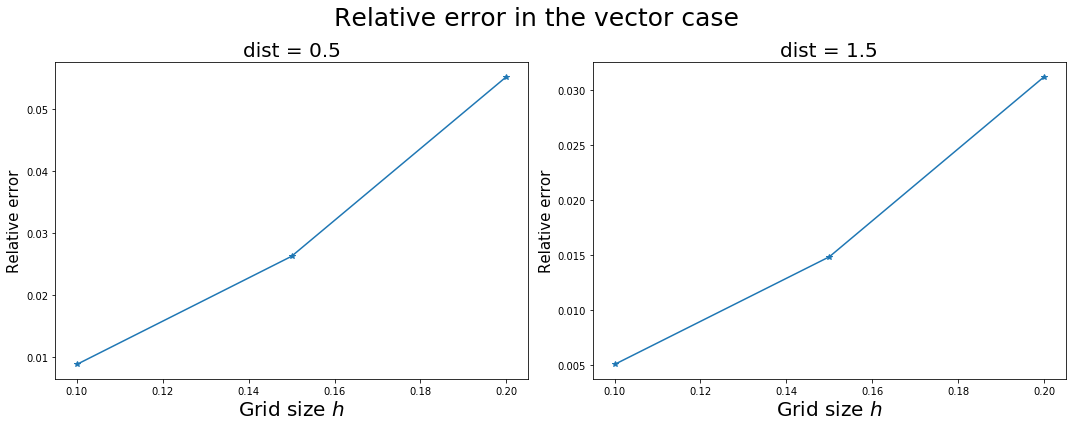

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.plot([0.1, 0.15, 0.2], Rel_err_05,'*-')
ax1.set_xlabel('Grid size $h$', fontsize = 20)
ax1.set_ylabel('Relative error', fontsize = 15)
ax1.set_title('dist = 0.5', fontsize = 20)

ax2.plot([0.1, 0.15, 0.2], Rel_err_15,'*-')
ax2.set_xlabel('Grid size $h$', fontsize = 20)
ax2.set_ylabel('Relative error', fontsize = 15)
ax2.set_title('dist = 1.5', fontsize = 20)

fig.tight_layout()
fig.suptitle('Relative error in the vector case', fontsize = 25)
fig.subplots_adjust(top=0.85)
fig.savefig('CasE_vector.pdf')